In [6]:
import sys
import os

project_path = r"D:\10x\Projects\Telecom-Customer-Behavior-and-Engagement-Insights"
if project_path not in sys.path:
    sys.path.append(project_path)


In [7]:
from scripts import TelecomAnalysis

database = "telecom"
password = "password"
table_name = "xdr_data"

analysis = TelecomAnalysis(database=database, password=password, table_name=table_name)

# Step 1: Load the data
data = analysis.load_data()

# Step 2: Explore the dataset
analysis.explore_data()


Data loaded successfully!

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600004 entries, 0 to 600003
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 596040 non-null  float64
 1   Start                                     600000 non-null  object 
 2   Start ms                                  600000 non-null  float64
 3   End                                       600000 non-null  object 
 4   End ms                                    600000 non-null  float64
 5   Dur. (ms)                                 600000 non-null  float64
 6   IMSI                                      597724 non-null  float64
 7   MSISDN/Number                             595740 non-null  float64
 8   IMEI                                      597716 non-null  float64
 9   Last Location Name                        595392 no

In [8]:

# Step 3: Find the top 10 handsets
top_handsets = analysis.find_top_handsets()
print("\nTop 10 Handsets:")
print(top_handsets)




Top 10 Handsets:
 Handset Type
Huawei B528S-23A                79008
Apple iPhone 6S (A1688)         37676
Apple iPhone 6 (A1586)          36092
undefined                       35948
Apple iPhone 7 (A1778)          25304
Apple iPhone Se (A1723)         20748
Apple iPhone 8 (A1905)          19972
Apple iPhone Xr (A2105)         18272
Samsung Galaxy S8 (Sm-G950F)    18080
Apple iPhone X (A1901)          15252
Name: count, dtype: int64

Top 10 Handsets:
Handset Type
Huawei B528S-23A                79008
Apple iPhone 6S (A1688)         37676
Apple iPhone 6 (A1586)          36092
undefined                       35948
Apple iPhone 7 (A1778)          25304
Apple iPhone Se (A1723)         20748
Apple iPhone 8 (A1905)          19972
Apple iPhone Xr (A2105)         18272
Samsung Galaxy S8 (Sm-G950F)    18080
Apple iPhone X (A1901)          15252
Name: count, dtype: int64


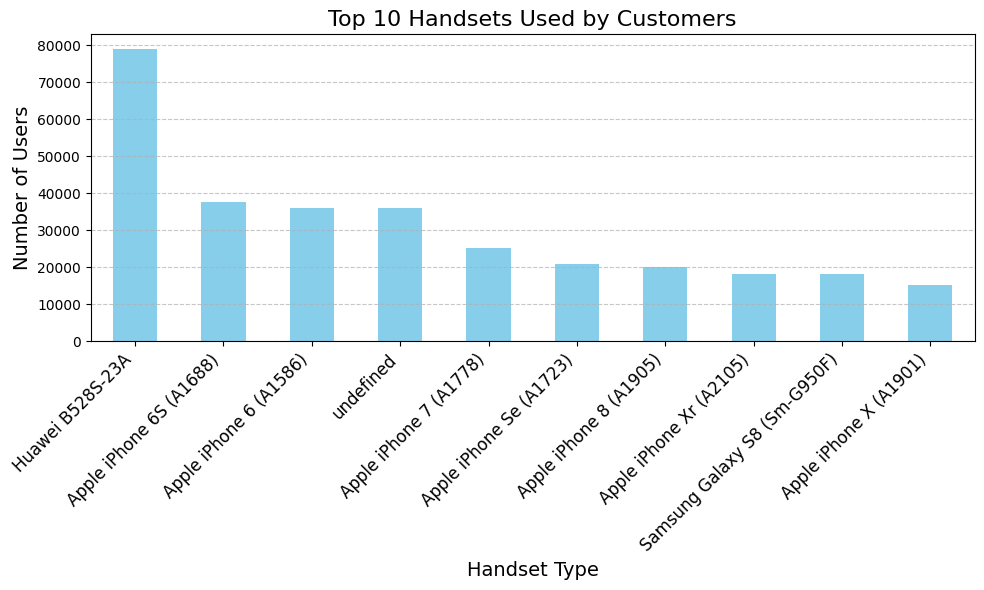

In [9]:
import matplotlib.pyplot as plt

# Plot the Top 10 Handsets
if top_handsets is not None:
    plt.figure(figsize=(10, 6))
    top_handsets.plot(kind='bar', color='skyblue')
    plt.title('Top 10 Handsets Used by Customers', fontsize=16)
    plt.xlabel('Handset Type', fontsize=14)
    plt.ylabel('Number of Users', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("No data available for plotting.")

In [10]:
# Step 4: Find the top 3 handset manufacturers
top_manufacturers = analysis.find_top_manufacturers()
print("\nTop 3 Handset Manufacturers:")
print(top_manufacturers)




Top 3 Handset Manufacturers:
 Handset Manufacturer
Apple      238260
Samsung    163356
Huawei     137692
Name: count, dtype: int64

Top 3 Handset Manufacturers:
Handset Manufacturer
Apple      238260
Samsung    163356
Huawei     137692
Name: count, dtype: int64


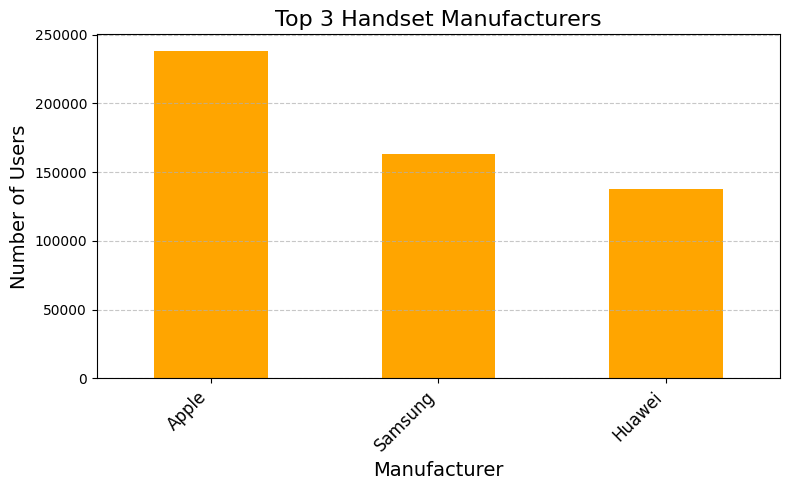

In [11]:
# Plot the Top 3 Handset Manufacturers
if top_manufacturers is not None:
    import matplotlib.pyplot as plt

    plt.figure(figsize=(8, 5))
    top_manufacturers.plot(kind='bar', color='orange')
    plt.title('Top 3 Handset Manufacturers', fontsize=16)
    plt.xlabel('Manufacturer', fontsize=14)
    plt.ylabel('Number of Users', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("No data available for plotting.")


In [12]:
if top_manufacturers is not None:
    top_handsets_per_manufacturer = analysis.find_top_handsets_per_manufacturer(top_manufacturers.index, n=5)
    for manufacturer, handsets in top_handsets_per_manufacturer.items():
        print(f"\nTop 5 Handsets for {manufacturer}:\n{handsets}")


Top 5 Handsets for Apple:
Handset Type
Apple iPhone 6S (A1688)    37676
Apple iPhone 6 (A1586)     36092
Apple iPhone 7 (A1778)     25304
Apple iPhone Se (A1723)    20748
Apple iPhone 8 (A1905)     19972
Name: count, dtype: int64

Top 5 Handsets for Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    18080
Samsung Galaxy A5 Sm-A520F      14896
Samsung Galaxy J5 (Sm-J530)     14784
Samsung Galaxy J3 (Sm-J330)     13936
Samsung Galaxy S7 (Sm-G930X)    12796
Name: count, dtype: int64

Top 5 Handsets for Huawei:
Handset Type
Huawei B528S-23A                  79008
Huawei E5180                       8316
Huawei P20 Lite Huawei Nova 3E     8084
Huawei P20                         5920
Huawei Y6 2018                     3988
Name: count, dtype: int64


In [13]:
# Step 6: Aggregate user metrics
user_metrics = analysis.aggregate_user_metrics()
print("\nAggregated User Metrics:")
print(user_metrics.head())

KeyError: "Column(s) ['Dur. (s)', 'bearer id'] do not exist"

In [13]:
# Step 7: Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values per Column:")
print(missing_values)


Missing Values per Column:
Bearer Id                                     3964
Start                                            4
Start ms                                         4
End                                              4
End ms                                           4
Dur. (ms)                                        4
IMSI                                          2280
MSISDN/Number                                 4264
IMEI                                          2288
Last Location Name                            4612
Avg RTT DL (ms)                             111316
Avg RTT UL (ms)                             111248
Avg Bearer TP DL (kbps)                          4
Avg Bearer TP UL (kbps)                          4
TCP DL Retrans. Vol (Bytes)                 352584
TCP UL Retrans. Vol (Bytes)                 386596
DL TP < 50 Kbps (%)                           3016
50 Kbps < DL TP < 250 Kbps (%)                3016
250 Kbps < DL TP < 1 Mbps (%)                 3016
DL 

In [14]:
# Detect outliers in numeric columns
numeric_columns = data.select_dtypes(include=['number']).columns
for column in numeric_columns:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"\nOutliers in {column}: {len(outliers)}")


Outliers in Bearer Id: 0

Outliers in Start ms: 0

Outliers in End ms: 0

Outliers in Dur. (ms): 28736

Outliers in IMSI: 53000

Outliers in MSISDN/Number: 96508

Outliers in IMEI: 0

Outliers in Avg RTT DL (ms): 56236

Outliers in Avg RTT UL (ms): 44972

Outliers in Avg Bearer TP DL (kbps): 52936

Outliers in Avg Bearer TP UL (kbps): 86124

Outliers in TCP DL Retrans. Vol (Bytes): 35808

Outliers in TCP UL Retrans. Vol (Bytes): 29616

Outliers in DL TP < 50 Kbps (%): 73408

Outliers in 50 Kbps < DL TP < 250 Kbps (%): 60880

Outliers in 250 Kbps < DL TP < 1 Mbps (%): 119004

Outliers in DL TP > 1 Mbps (%): 148264

Outliers in UL TP < 10 Kbps (%): 88492

Outliers in 10 Kbps < UL TP < 50 Kbps (%): 127996

Outliers in 50 Kbps < UL TP < 300 Kbps (%): 18172

Outliers in UL TP > 300 Kbps (%): 9828

Outliers in HTTP DL (Bytes): 49488

Outliers in HTTP UL (Bytes): 41660

Outliers in Activity Duration DL (ms): 106636

Outliers in Activity Duration UL (ms): 104088

Outliers in Dur. (ms).1: 2873

In [15]:
missing_values = data.isnull().sum()
print("\nMissing Values per Column:")
print(missing_values)


Missing Values per Column:
Bearer Id                                     3964
Start                                            4
Start ms                                         4
End                                              4
End ms                                           4
Dur. (ms)                                        4
IMSI                                          2280
MSISDN/Number                                 4264
IMEI                                          2288
Last Location Name                            4612
Avg RTT DL (ms)                             111316
Avg RTT UL (ms)                             111248
Avg Bearer TP DL (kbps)                          4
Avg Bearer TP UL (kbps)                          4
TCP DL Retrans. Vol (Bytes)                 352584
TCP UL Retrans. Vol (Bytes)                 386596
DL TP < 50 Kbps (%)                           3016
50 Kbps < DL TP < 250 Kbps (%)                3016
250 Kbps < DL TP < 1 Mbps (%)                 3016
DL 